In [17]:
# import libraries
import numpy as np 
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,IsolationForest
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [2]:
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 99)

In [14]:
def encoding(dataframe_feature):
    if(dataframe_feature.dtype == 'object'):
        return LabelEncoder().fit_transform(dataframe_feature)
    else:
        return dataframe_feature

In [3]:
# read all files from csv to DataFrame
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train = train.set_index('Id')

In [7]:
# checking for missing values 1
missing_values = pd.concat([train.isnull().sum()], axis = 1)
print(missing_values[missing_values[0]>0])

                 0
LotFrontage    259
Alley         1369
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
FireplaceQu    690
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
PoolQC        1453
Fence         1179
MiscFeature   1406


In [8]:
train = train.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [9]:
# checking for missing values 2
missing_values = pd.concat([train.isnull().sum()], axis = 1)
print(missing_values[missing_values[0]>0])

               0
MasVnrType     8
MasVnrArea     8
BsmtQual      37
BsmtCond      37
BsmtExposure  38
BsmtFinType1  37
BsmtFinType2  38
Electrical     1
GarageType    81
GarageYrBlt   81
GarageFinish  81
GarageQual    81
GarageCond    81


In [10]:
# remove the missing values from the dataset 
# dropna()
train = train.dropna()

In [11]:
numeric = train.describe().columns
nonnumeric = [col for col in train.columns if col not in train.describe().columns]

In [12]:
print("numeric columns count: ", len(numeric))
print("non numeric columns count: ", len(nonnumeric))

numeric columns count:  36
non numeric columns count:  38


Since there are many non numerical columns there is a need to convert them into numerical using Label Encoder or One Hot encoder. One hot encoder creates new features whereas label encoder uses the same features.

In [15]:
train = train.apply(encoding)

In [16]:
numeric = train.describe().columns
nonnumeric = [col for col in train.columns if col not in train.describe().columns]
print("numeric columns count: ", len(numeric))
print("non numeric columns count: ", len(nonnumeric))

numeric columns count:  74
non numeric columns count:  0


Now all the features are converted into numerical features. Now we can apply regression algorithms and predict the sales price easily.

In [18]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,2,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


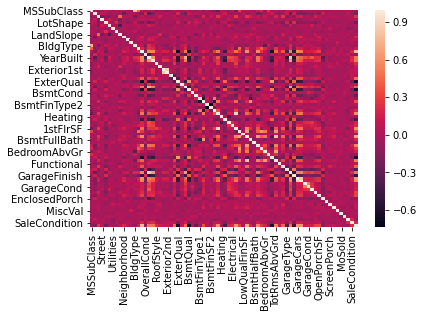

In [19]:
sns.heatmap(train.corr())

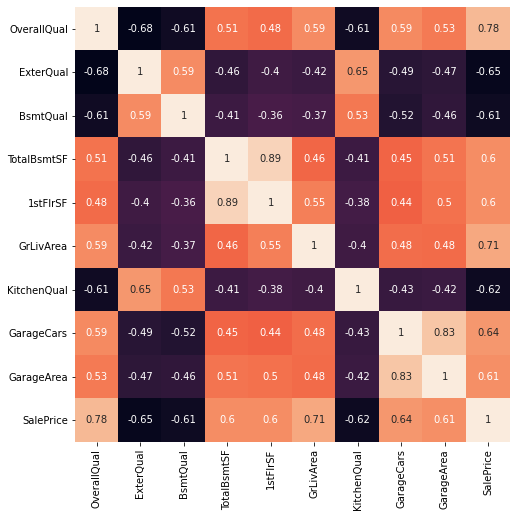

In [20]:
correlation_matrix = train.corr()
essential_features = correlation_matrix.index[abs(correlation_matrix['SalePrice']) > 0.6]
plt.figure(figsize = (8, 8))
sns.heatmap(train[essential_features].corr(), cbar = False, annot = True, square = True)

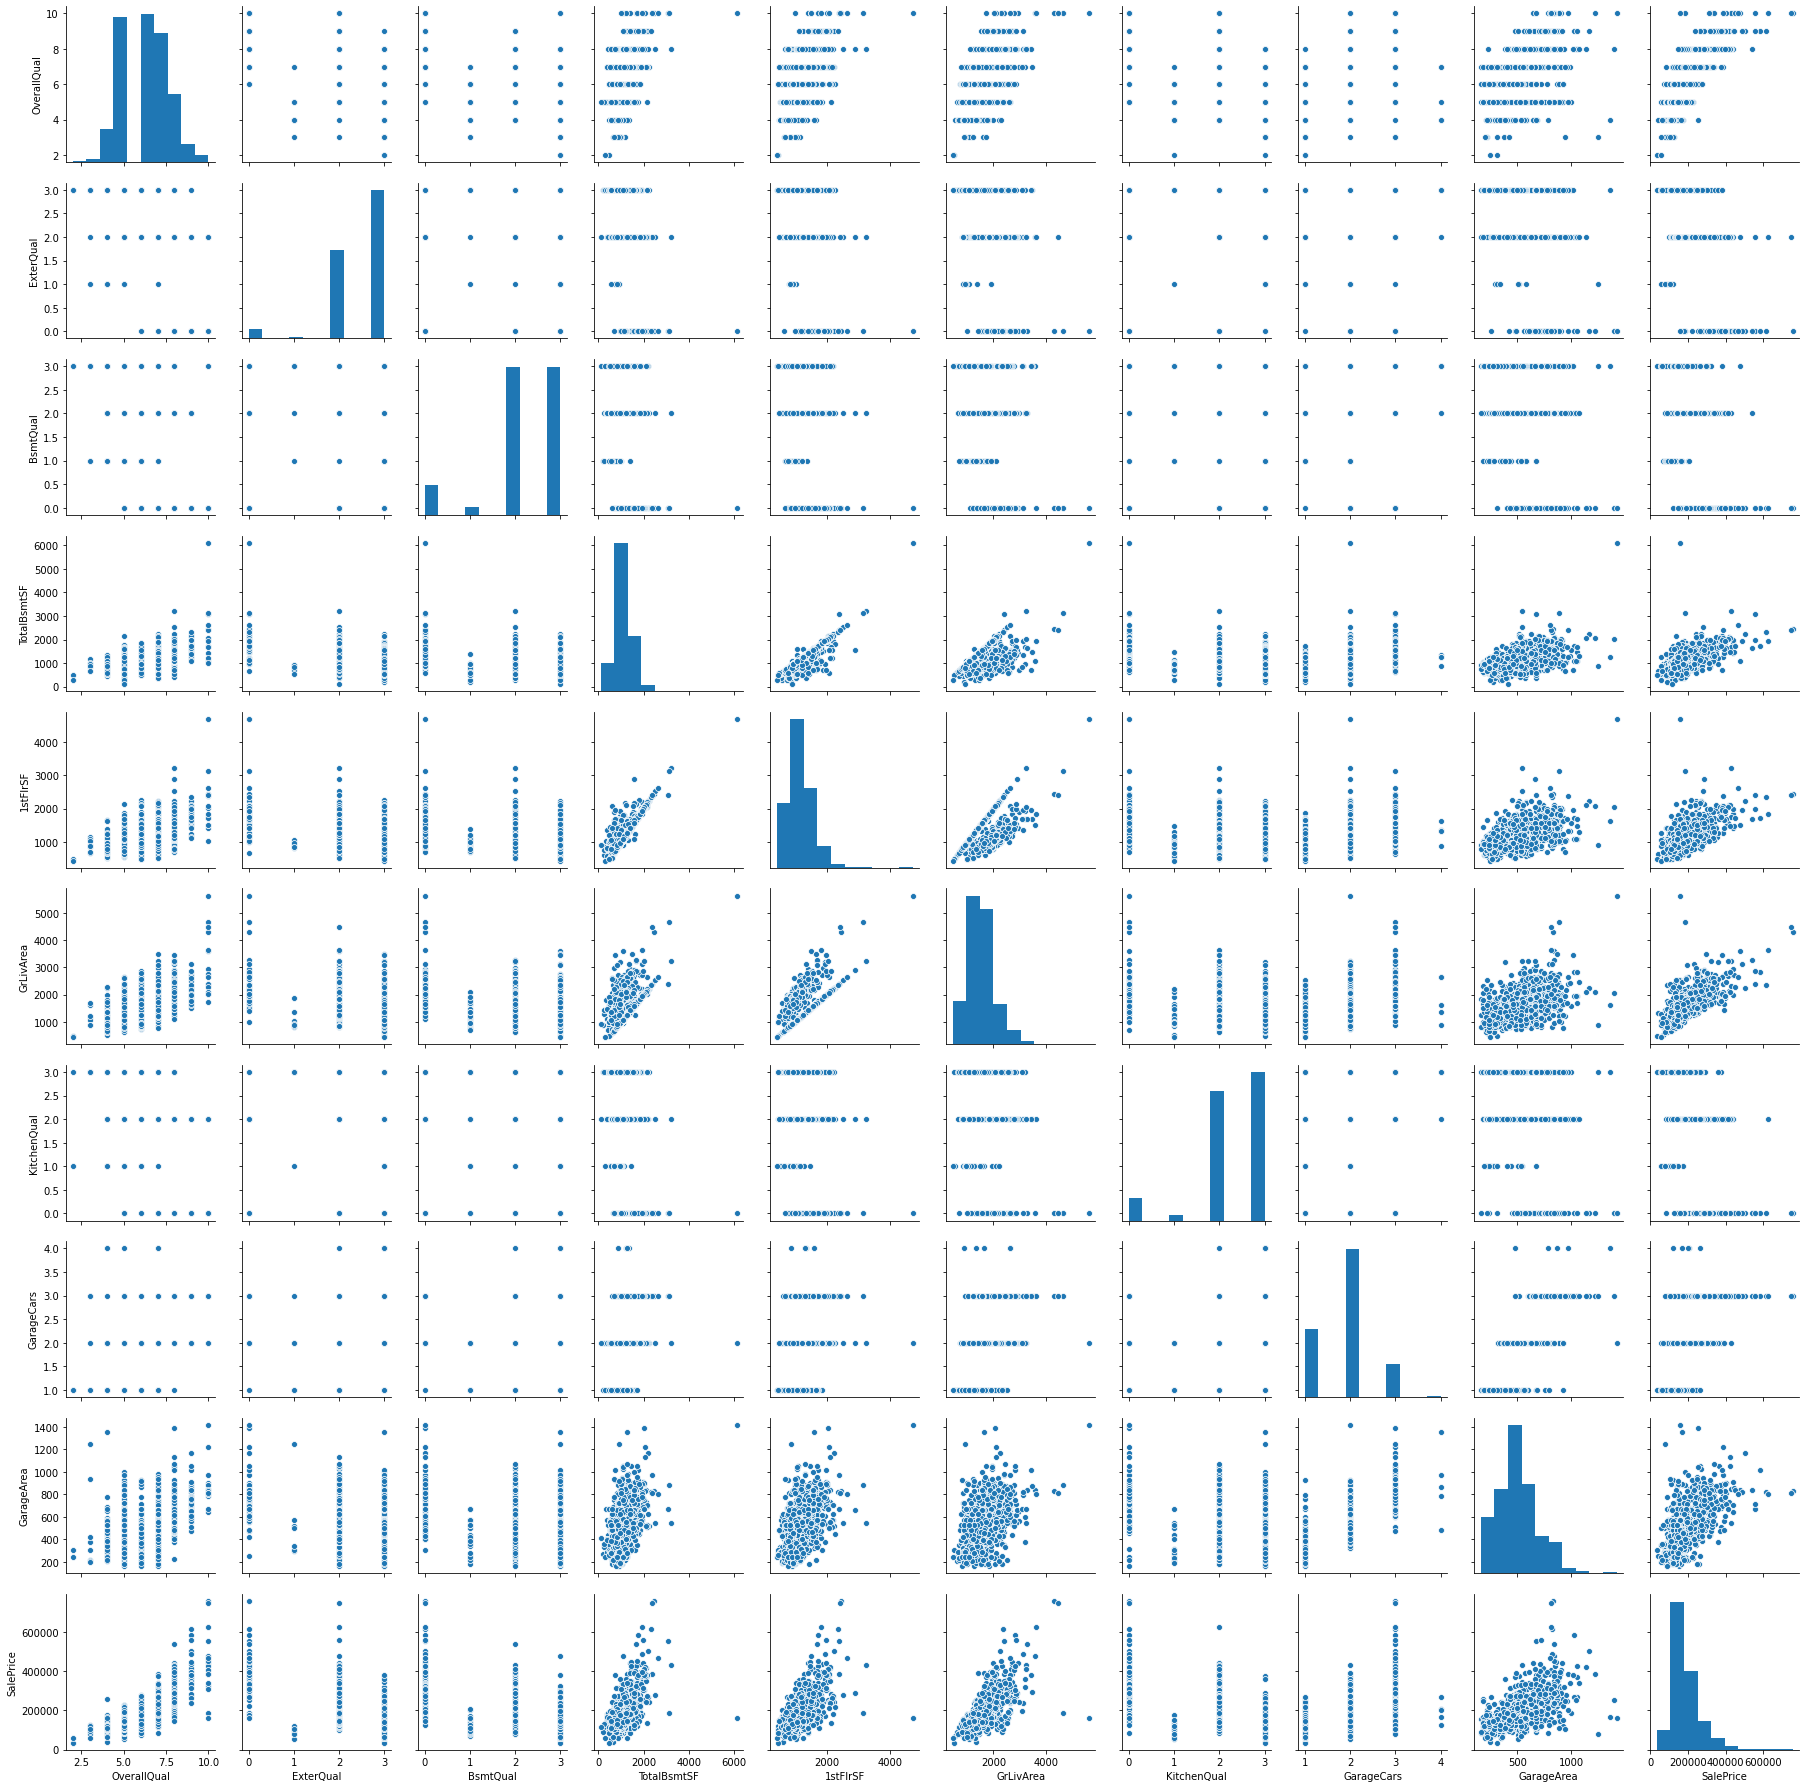

In [21]:
sns.pairplot(train[essential_features])

In [22]:
train = train[(train["SalePrice"] < 500000) &
              (train["GrLivArea"] < 3000) &
              (train["TotalBsmtSF"] < 2300) &
              (train["1stFlrSF"] < 2200) & 
              (train["GarageArea"] < 1200)]

In [23]:
train.shape

(1305, 74)

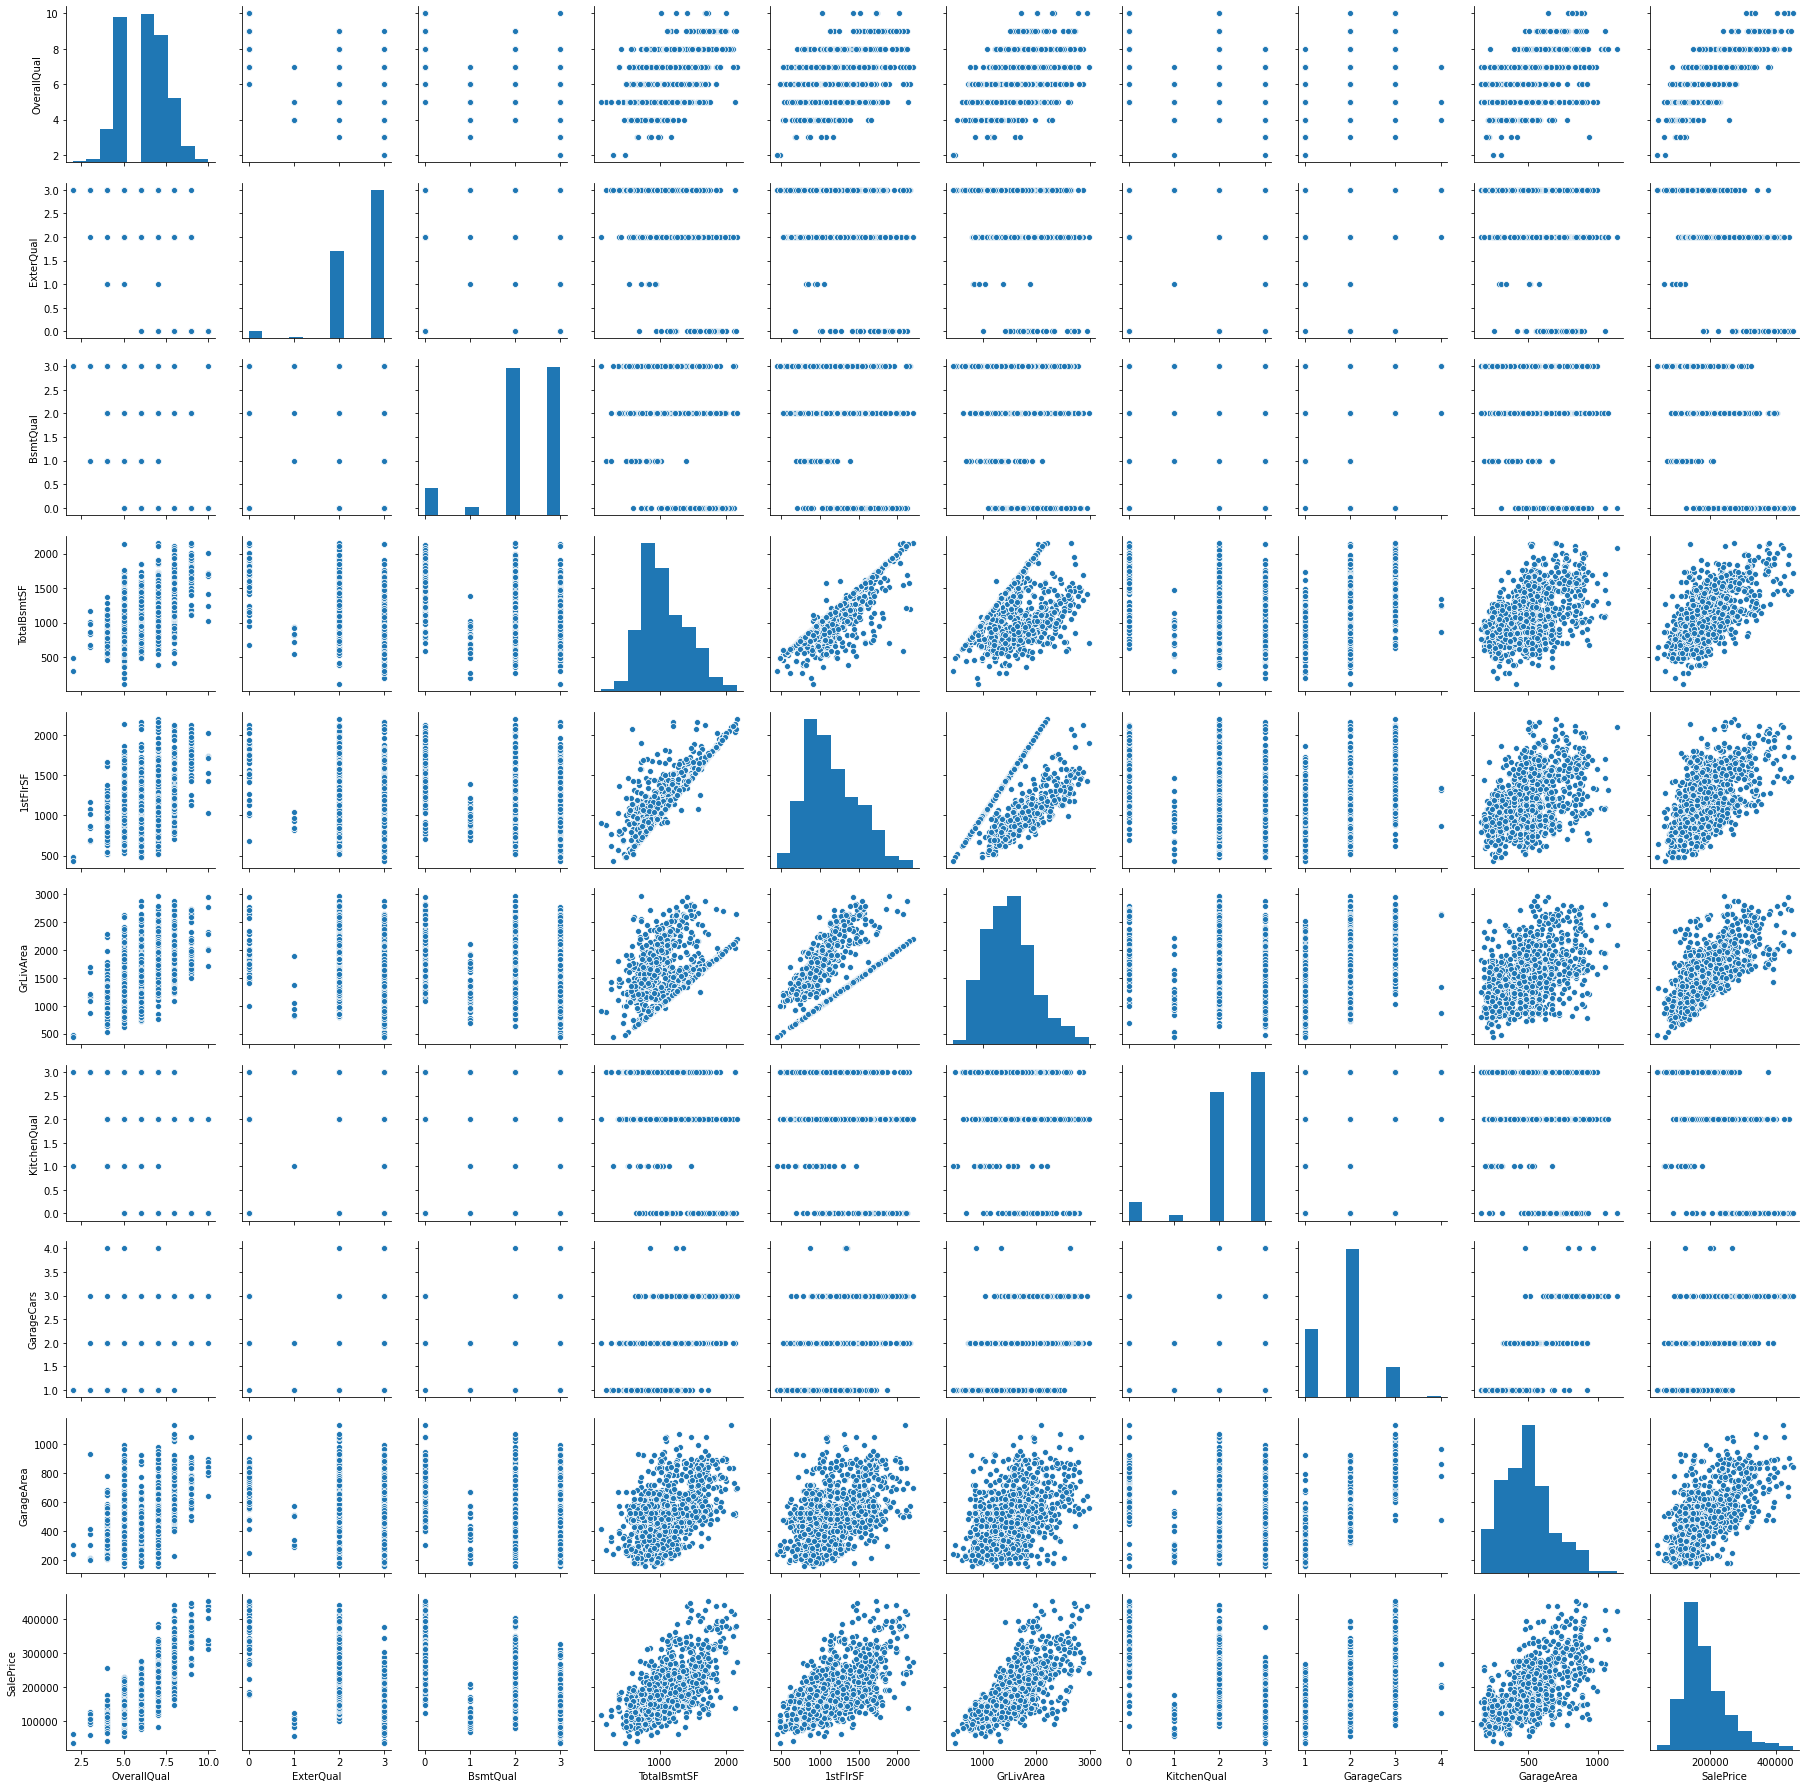

In [24]:
sns.pairplot(train[essential_features])

In [25]:
# making the input and target features
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
# importing KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
# fitting the model with the training dataset
knn.fit(X_train, y_train)
# predicting the values
predicted_value = knn.predict(X_test)
# calculating the accuracy
rmse_before_cleaning = np.sqrt(mean_squared_error(predicted_value, y_test))
print(rmse_before_cleaning)

38464.941236609026


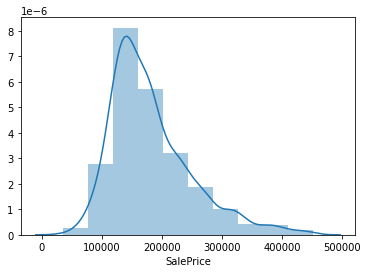

In [29]:
sns.distplot(train['SalePrice'], bins = 10)

In [31]:
parameters = {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
            'algorithm' : ['ball_tree', 'brute']
             }
grid_search_cv = GridSearchCV(KNeighborsRegressor(), parameters)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)